<a href="https://colab.research.google.com/github/StanislavParkhomenko/Lab_Neiro/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip drive/MyDrive/data/animals.zip

In [2]:
#Importing the required Liberaries
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report 
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras import backend as K
from keras.models import load_model
from tensorflow.keras.utils import normalize, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from IPython.display import Image
from tkinter.filedialog import askopenfilename

In [4]:
datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_it = datagen.flow_from_directory('/content/animals/train', class_mode='categorical', target_size=(224,224), batch_size= 128)
test_it = datagen.flow_from_directory('/content/animals/test', batch_size=128, target_size=(224,224), class_mode='categorical')

Found 1700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [5]:
class_name = ['cats', 'panda']

x_train, y_train = train_it.next()
x_test, y_test=test_it.next()

In [6]:
batch_size = 128
num_classes = 2
epochs = 50
img_rows, img_cols = 224, 224
input_shape = (img_rows,img_cols,3)

In [7]:
model = keras.models.Sequential()
def plain_cnn_model():
 #Defining Model 
 #Adding Layers to Model
 model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu'))
 model.add(Flatten())
 model.add(Dense(128, activation='relu'))
 model.add(Dense(num_classes, activation='softmax'))
 #Compiling the model
 model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])
 return model

plain_cnn_model()

In [8]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,       
          validation_data=(x_test, y_test))
#Eveluating the Accuracy and loss of Model
score = model.evaluate(x_test, y_test, verbose=0)
global loss_plain
global acc_plain
loss_plain=score[0]*100
acc_plain=score[1]*100
print('Test loss:', loss_plain)
print('Test accuracy:', acc_plain)
model.save('Wildlife.h5')

Epoch 1/50
1/1 [==============================] - 14s 14s/step - loss: 0.6881 - accuracy: 0.5000 - val_loss: 0.6778 - val_accuracy: 0.5859
Epoch 2/50
1/1 [==============================] - 12s 12s/step - loss: 0.6727 - accuracy: 0.6250 - val_loss: 0.6692 - val_accuracy: 0.5859
Epoch 3/50
1/1 [==============================] - 13s 13s/step - loss: 0.6608 - accuracy: 0.6406 - val_loss: 0.6624 - val_accuracy: 0.6328
Epoch 4/50
1/1 [==============================] - 12s 12s/step - loss: 0.6499 - accuracy: 0.6875 - val_loss: 0.6555 - val_accuracy: 0.6406
Epoch 5/50
1/1 [==============================] - 12s 12s/step - loss: 0.6400 - accuracy: 0.6875 - val_loss: 0.6496 - val_accuracy: 0.6406
Epoch 6/50
1/1 [==============================] - 12s 12s/step - loss: 0.6306 - accuracy: 0.7031 - val_loss: 0.6436 - val_accuracy: 0.6328
Epoch 7/50
1/1 [==============================] - 12s 12s/step - loss: 0.6218 - accuracy: 0.7109 - val_loss: 0.6386 - val_accuracy: 0.6641
Epoch 8/50
1/1 [===========

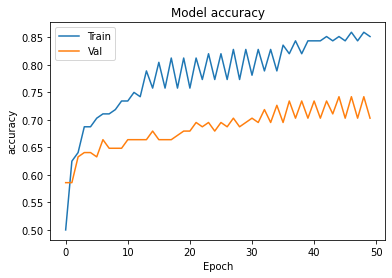

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

[[1. 0.]]


Text(0.5, 1.0, 'Is cat')

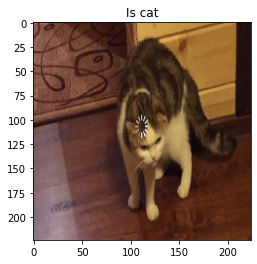

In [4]:
from pyparsing import results
prediction = load_model('Wildlife.h5')
img = image.load_img("meme_cat.jpg", target_size=(224,224))

x = image.img_to_array(img)
x = x.reshape(-1,224, 224, 3)

prediction = prediction.predict(x)
print(prediction)
if prediction[0][0]>prediction[0][1]:
  result="cat"
else:
  result="panda"

plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"Is {result}" )
#plt.axis("off")